# Functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

### 2D Plots
- y = x**2 + 1

1000 0.0 2.0


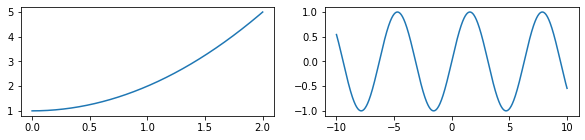

In [2]:
x, x2 = np.linspace(0, 2, 1000), np.linspace(-10,10,1000)
print(len(x), x[0], x[-1])

y = x**2 + 1
y2 = np.sin(x2)


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,2))

ax1.plot(x,y)
ax2.plot(x2,y2)

# Taylor Series
- express function as polynomial
- y = f(x) -> y = (const, x, x^2, x^3, ...)  
## given x0 and f(x0), to guess the point x1 close enough to the point x0, what do we need ?
- the slope at point x0
- to make it more precise, the second derivative at point x0
- to make it more precise, the third derivative at point x0 ...
- So, if we have infinite derivative, we can express the function
- 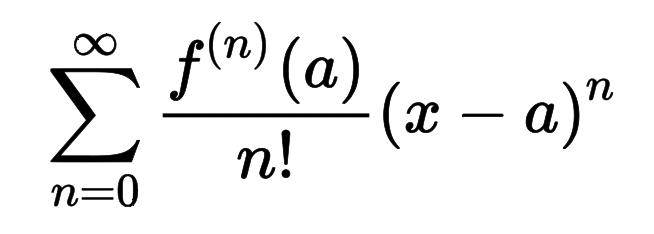
- Broad Statement : In reality, many things are non-linear. BUT using taylor series, you can make things linear

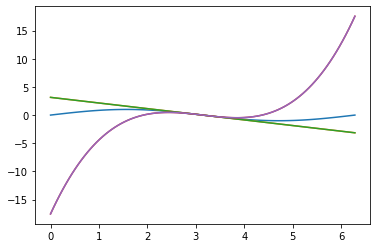

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y_exact = np.sin(x)
plt.plot(x,y_exact)

# approximation using first derivative
x0 = np.pi
y2 = np.sin(x0) + (x-x0)*np.cos(x0)
plt.plot(x,y2)

# approximation using second derivative
y3 = y2 + ((x-x0)**2/2)*(-np.sin(x0))
plt.plot(x,y3)

# approximation using third derivative - won't do anything as cos(x0) == 0
y4 = y3 + ((x-x0)**3/3*2)*(-np.cos(x0))
plt.plot(x,y4)

# approximation using fourth derivative - won't do anything as cos(x0) == 0
y5 = y4 + ((x-x0)**4/4*3*2)*(np.sin(x0))
plt.plot(x,y5)


## 3D Plots

In [5]:
# fig, ax = plt.subplots(subokit_kw = {'projection' : '3d'})

# # Make Data
# X = np.arrange(-5,5,0.25)
# Y = np.arrange(-5,5,0.25)
# X, Y = np.meshgrid(X,Y)

# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# # Plot Surface
# ax

# Solving Equations
- System of linear eqs : we can use inverse matrix to solve
### Non-Linear eqs 
- find x such that y = f(x) = 0
- Use Newton-Raphson Method (or bisection method)
- dependent upon finding dy/dx

# Finding x where y is either min or max
- y = ax^3 + bx^2 + cx + d
- dy/dx = 3ax^2 + 2bx +  c = 0, so finding min/max is solving roots

In [17]:
from scipy.optimize import fsolve
import scipy.optimize as op

# Roots
# find roots of x^2 + 4x + 1 = 0
a, b, c = 1., 4., 1.
print("Solutions of quadratic eq:{}, {}". format((-b+np.sqrt(b**2-4*a*c))/(2*a), (-b-np.sqrt(b**2-4*a*c))/(2*a)))

Solutions of quadratic eq:-0.2679491924311228, -3.732050807568877


# One Equations
## Using the Newton-Raphson Method
- use fsolve

In [13]:
def oneEquation(z): # z is a vector of all variables. in this case only one variable
    x = z[0] # as only one, use index 0. if more, y = z[1], ...
    F = np.empty((1)) # get an empty array, also 1
    F[0] = a*x**2 + b*x + c # fetch the value of function in x
    return F

zGuess = np.array([-5])
z = fsolve(oneEquation, zGuess)

print("Solution from fsolve: {}". format(z))

# fsolve gives you only one solution.

if fsolve(oneEquation, z+100) != z: # just define proper skipping to get the second root
    print("Another solution : {}".format(fsolve(oneEquation, z+100)))
else:
    print("Another solution : {}".format(fsolve(oneEquation, z-100)))

Solution from fsolve: [-3.73205081]
Another solution : [-0.26794919]


## Minimize
### to Maximize, you can minimize the negative of the function

In [21]:
zGuess = np.array([-5])
z = op.minimize(oneEquation, zGuess)

print("Minimum from minimize:")
print(z)

Minimum from minimize:
      fun: -2.999999999999999
 hess_inv: array([[0.5]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.99999997])


# Two Equations

In [22]:
# equation 1 : xcos(y) - 4 = 0
# equation 2 

def twoEquation(z):
    x = z[0]; y= z[1]
    F = np.empty((2))
    F[0] = x*np.cos(y)-4.
    F[1] = x*y-y-5.
    return F

zGuess = np.array([10., 0.])
z = fsolve(twoEquation, zGuess)
print(z)

[6.50409711 0.90841421]
[-3.50830476e-14  3.55271368e-14]
